In [2]:
!pip install tensorflow

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import seaborn as sns
import os
import random

# Count the no. of images in each folder

In [4]:
def count_images_in_subfolders(root_folder):
    class_counts = {}
    for foldername in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, foldername)
        if os.path.isdir(folder_path):
            image_count = len([filename for filename in os.listdir(folder_path) if filename.endswith(('.jpg', '.jpeg', '.png'))])
            class_counts[foldername] = image_count
    return class_counts

# Print the image distribution in each folder

In [5]:
def plot_bar_graph(class_counts, name, color):
    labels = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(labels, counts, color=color)
    plt.xlabel('Subfolders')
    plt.ylabel('Number of Images')
    plt.title(f'Number of Images in {name}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

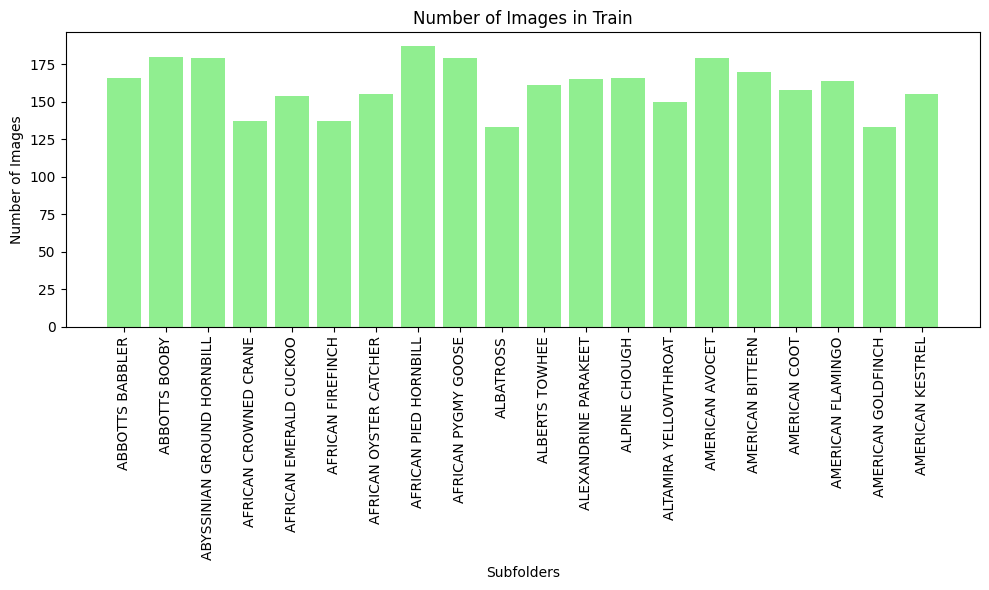

In [6]:
class_counts = count_images_in_subfolders('C:\\Users\\tendu\\Desktop\Chandu Files\\Programming\\Machine Learning\\Image Classification (Birds)\\Data\\train')
plot_bar_graph(class_counts, 'Train', 'lightgreen')

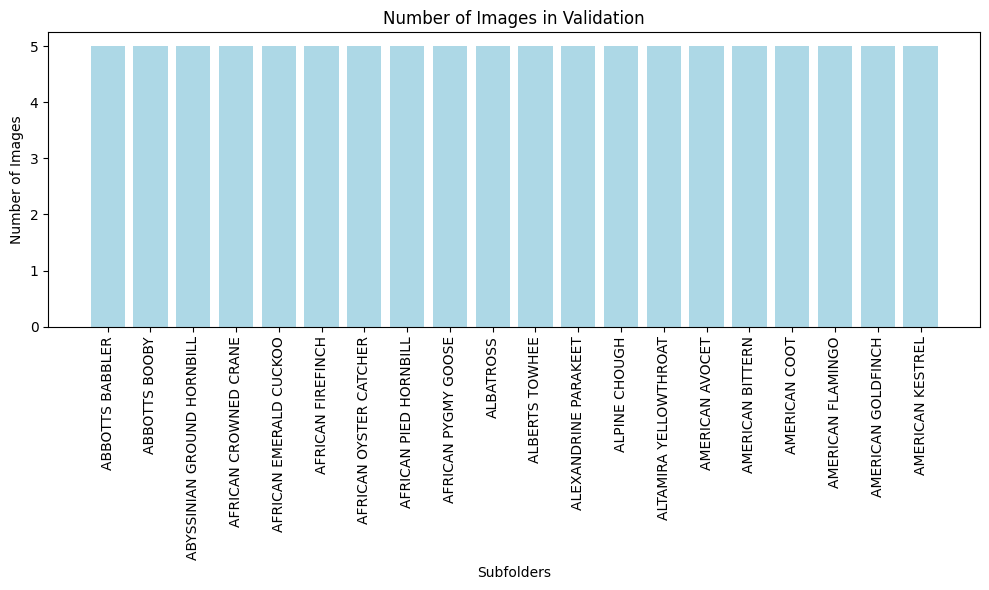

In [7]:
class_counts = count_images_in_subfolders('C:\\Users\\tendu\\Desktop\Chandu Files\\Programming\\Machine Learning\\Image Classification (Birds)\\Data\\valid')
plot_bar_graph(class_counts, 'Validation', 'lightblue')

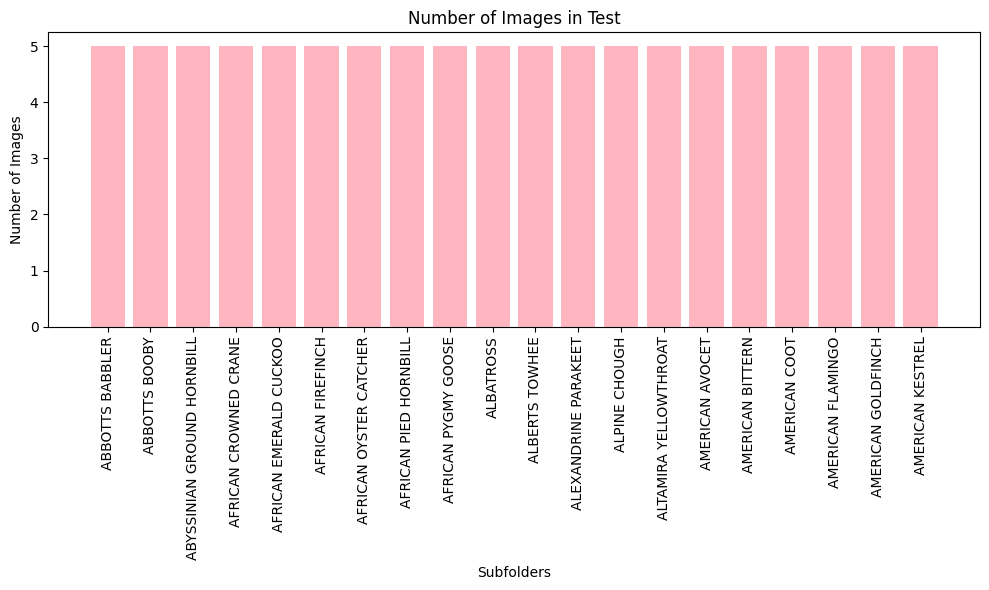

In [8]:
class_counts = count_images_in_subfolders('C:\\Users\\tendu\\Desktop\Chandu Files\\Programming\\Machine Learning\\Image Classification (Birds)\\Data\\test')
plot_bar_graph(class_counts, 'Test', 'lightpink')

# Visualize a few images from the training set

In [9]:
def visualize_random_images(directory, num_images=5):
    # Get a list of all image files
    image_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith((".jpg", ".jpeg", ".png")):
                image_files.append(os.path.join(root, file))

    # Randomly select images
    random_images = random.sample(image_files, num_images)

    # Plot the images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i, image_path in enumerate(random_images):
        img = mpimg.imread(image_path)
        subfolder_name = os.path.basename(os.path.dirname(image_path))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(subfolder_name)  # Set subfolder name as title
    plt.show()

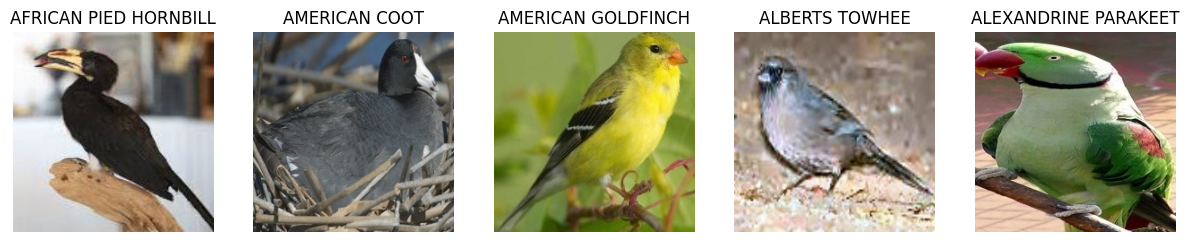

In [10]:
visualize_random_images('C:\\Users\\tendu\\Desktop\Chandu Files\\Programming\\Machine Learning\\Image Classification (Birds)\\Data\\train', num_images=5)

# Create data loaders from Training and Validation sets.
## *Apply augmentation only for the Training set*

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SHAPE = (224,224)
BATCH_SIZE = 32

tf.random.set_seed(42)

train_dir = 'C:\\Users\\tendu\\Desktop\Chandu Files\\Programming\\Machine Learning\\Image Classification (Birds)\\Data\\train'
valid_dir = 'C:\\Users\\tendu\\Desktop\Chandu Files\\Programming\\Machine Learning\\Image Classification (Birds)\\Data\\valid'

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True)

valid_datagen = ImageDataGenerator(rescale = 1/255.)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                              target_size = IMG_SHAPE,
                                              class_mode='categorical',
                                              batch_size=BATCH_SIZE,
                                              shuffle=True,
                                              seed = 42)

valid_data = valid_datagen.flow_from_directory(valid_dir,
                                              target_size = IMG_SHAPE,
                                              class_mode='categorical',
                                              batch_size=16,
                                              shuffle=True,
                                              seed = 42)

Found 3208 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [12]:
len(train_data_augmented), len(valid_data)

(101, 7)

In [13]:
classes = list(train_data_augmented.class_indices.keys())

In [14]:
classes

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL']

# **AlexNet Model**

In [15]:
model= tf.keras.Sequential([
    # Convolutional layers
    tf.keras.layers.Conv2D(64, (11, 11), strides=(4, 4), padding='same', activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(192, (5, 5), strides=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),

    # Fully connected layers 3d output
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(20, activation='softmax')
])

model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
             metrics = ['accuracy'])


In [16]:
history = model.fit(train_data_augmented,
         epochs = 10,
         validation_data = valid_data)

Epoch 1/10


101/101 [==============================] - 64s 609ms/step - loss: 2.9268 - accuracy: 0.0729 - val_loss: 2.8725 - val_accuracy: 0.1000
Epoch 2/10
101/101 [==============================] - 54s 538ms/step - loss: 2.6594 - accuracy: 0.1453 - val_loss: 2.4535 - val_accuracy: 0.1700
Epoch 3/10
101/101 [==============================] - 54s 536ms/step - loss: 2.4448 - accuracy: 0.1951 - val_loss: 2.1331 - val_accuracy: 0.3400
Epoch 4/10
101/101 [==============================] - 54s 529ms/step - loss: 2.2229 - accuracy: 0.2774 - val_loss: 1.9727 - val_accuracy: 0.3500
Epoch 5/10
101/101 [==============================] - 54s 533ms/step - loss: 2.0640 - accuracy: 0.3276 - val_loss: 1.6930 - val_accuracy: 0.4300
Epoch 6/10
101/101 [==============================] - 58s 572ms/step - loss: 1.9231 - accuracy: 0.3697 - val_loss: 1.7039 - val_accuracy: 0.4100
Epoch 7/10
101/101 [==============================] - 56s 554ms/step - loss: 1.7945 - accuracy: 0.4055 - val_loss: 1.5084 - val_

<Axes: >

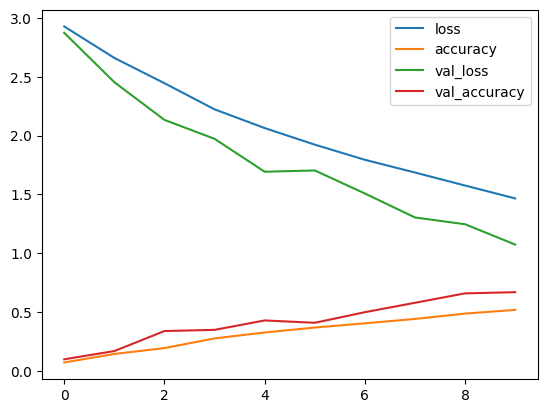

In [17]:
pd.DataFrame(history.history).plot()

:# Analyse the performance of our model in Test directory

In [18]:
test_data_dir = 'C:\\Users\\tendu\\Desktop\Chandu Files\\Programming\\Machine Learning\\Image Classification (Birds)\\Data\\train'

test_datagen = ImageDataGenerator(rescale=1./255)  # generate batches of image data

batch_size = 32

test_data = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3208 images belonging to 20 classes.


In [19]:
!pip install tabulate

In [20]:
train_evaluation = model.evaluate(train_data_augmented)#evalutes training and testing datasets into table
train_accuracy = train_evaluation[1]
train_loss = train_evaluation[0]


valid_evaluation = model.evaluate(valid_data)
valid_accuracy = valid_evaluation[1]
valid_loss = valid_evaluation[0]


test_evaluation = model.evaluate(test_data)
test_accuracy = test_evaluation[1]
test_loss = test_evaluation[0]

# Generate a table
from tabulate import tabulate

data = [
    ["Training", train_accuracy, train_loss],
    ["Validation", valid_accuracy, valid_loss],
    ["Test", test_accuracy, test_loss]
]

headers = ["Dataset", "Accuracy", "Loss"]

table = tabulate(data, headers=headers, tablefmt="grid")

print(table)


101/101 [==============================] - 14s 135ms/step - loss: 1.0968 - accuracy: 0.6521
+------------+------------+---------+
| Dataset    |   Accuracy |    Loss |
+============+============+=========+
| Training   |   0.571696 | 1.29636 |
+------------+------------+---------+
| Validation |   0.67     | 1.0744  |
+------------+------------+---------+
| Test       |   0.65212  | 1.09682 |
+------------+------------+---------+


In [21]:
test_data.classes

array([ 0,  0,  0, ..., 19, 19, 19])

In [22]:
test_predictions = model.predict(test_data)
test_predictions = np.argmax(test_predictions, axis=1)

101/101 [==============================] - 16s 151ms/step


In [23]:
test_predictions

array([15,  0,  0, ..., 15, 19,  8], dtype=int64)

# Use the model to predict for the given test images

In [24]:
def predict_images(directory):
    image_paths = [os.path.join(directory, file) for file in os.listdir(directory)]
    num_images = len(image_paths)

    images = []
    predictions = []

    for image_path in image_paths:
        image = tf.io.read_file(image_path)
        image = tf.image.decode_image(image, channels=3)
        image = tf.image.resize(image, (224, 224))
        image = image / 255.0
        images.append(image)

    images = np.array(images)

    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)

    plt.figure(figsize = (20,20))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.title(classes[predicted_classes[i]])
        plt.axis(False)

    plt.show()


1/1 [==============================] - 0s 167ms/step


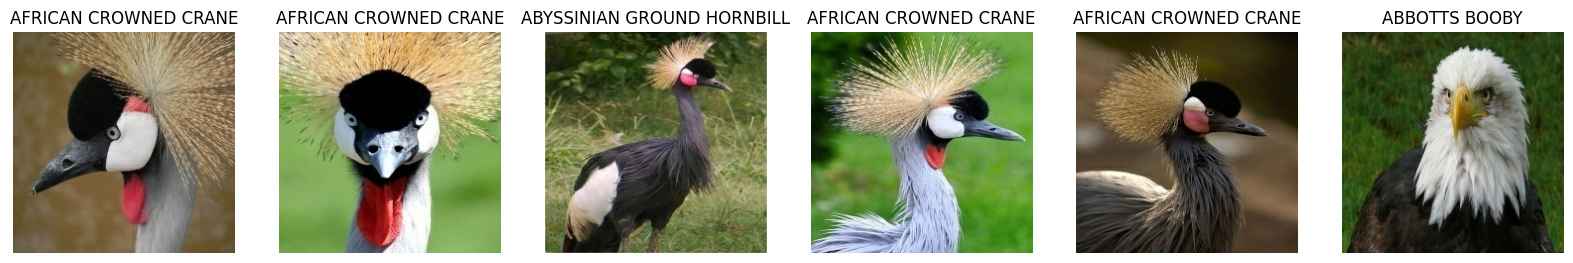

In [25]:
predict_images('C:\\Users\\tendu\\Desktop\Chandu Files\\Programming\\Machine Learning\\Image Classification (Birds)\\Data\\images to predict')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 64)        23296     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 192)       307392    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 192)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       663936    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 256)       8

In [27]:
model.save('model/saved_model.h5')

C:\Users\tendu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
